# Region位置を決める

In [70]:
import cv2
def get_frame(filepath, frame_num=0, x=0, y=0, w=None, h=None):
    cap = cv2.VideoCapture(filepath)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    if not ret:
        return None
    if w and h:
        frame = frame[y:y+h, x:x+w]
    return frame

In [178]:
from glob import glob

files = glob('sample_video/*.mp4')
filepath = files[0]

sample_video/8oFzkYH9A54.mp4


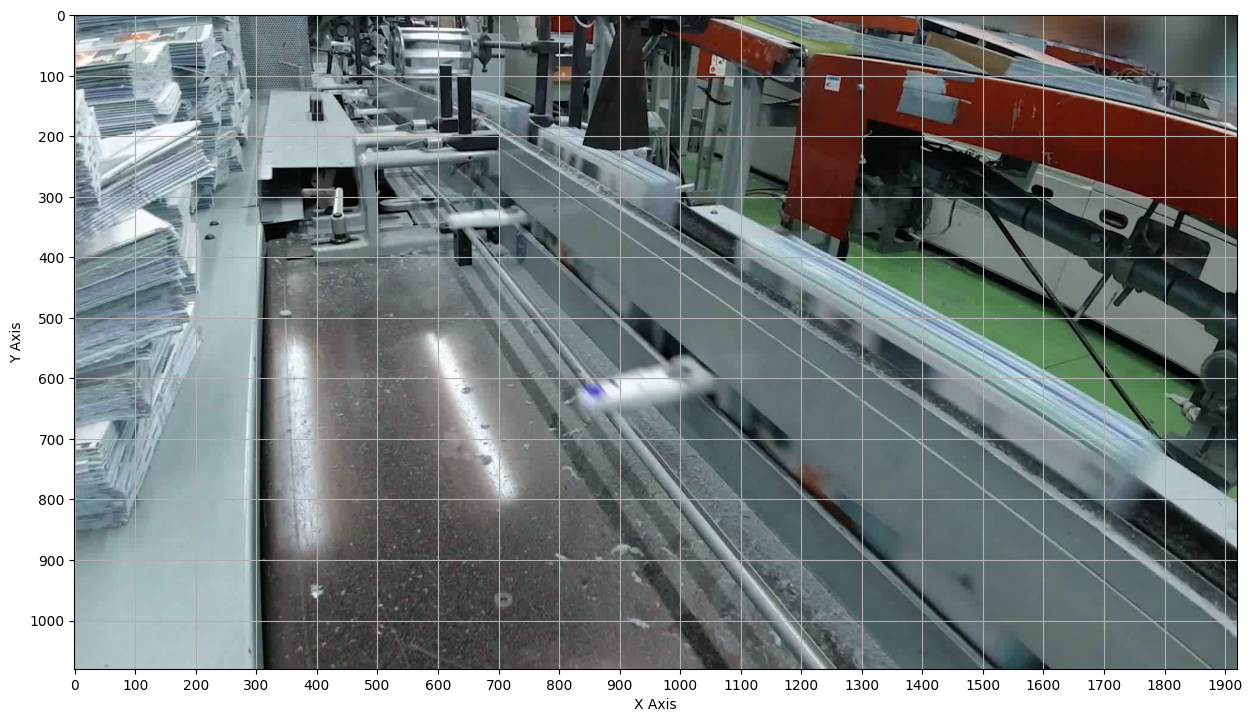

In [177]:
# 必要なライブラリのインポート
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像の読み込み
print(filepath)
image = get_frame(filepath)

# 画像の表示
plt.figure(figsize=(15, 15))  # 画像の表示サイズを指定
plt.imshow(image)

# x軸、y軸を表示する
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# 軸の目盛りを細かく設定
height, width, _ = image.shape
plt.xticks(np.arange(0, width, 100))  # x方向に20分割
plt.yticks(np.arange(0, height, 100))  # y方向に20分割

# グリッドを表示する（任意）
plt.grid(True)

# プロットの表示
plt.show()

In [175]:
"""regionの位置を指定して、その領域を赤枠で囲んだ動画を再生する"""
region = {"x": 600, "y": 50, "w": 25, "h": 25}
times = 10
start_time = 8

cap = cv2.VideoCapture(filepath)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_time*25)
frames = []

for i in range(times*25):
    ret, frame = cap.read()
    if not ret:
        break
    
    start_point = (region["x"], region["y"])
    end_point = (region["x"] + region["w"], region["y"] + region["h"])
    color = (0, 0, 255)
    thickness = 2
    
    cv2.rectangle(frame, start_point, end_point, color, thickness)
    cv2.imshow('frame', frame)
    cv2.waitKey(1000 // 25)

cv2.destroyAllWindows()
cap.release()

In [135]:
"""regionの位置を指定して、その領域を切り出した動画を再生する"""
cap = cv2.VideoCapture(filepath)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_time*25)
frames = []
for i in range(times*25):
    ret, frame = cap.read()
    if not ret:
        break
    frame = frame[region["y"]:region["y"]+region["h"], region["x"]:region["x"]+region["w"]]
    frames.append(frame)
    cv2.imshow('frame', frame)
    cv2.waitKey(1000//25)
cv2.destroyAllWindows()


In [210]:
"""sample.jsonに記載されているregionの位置を全て赤枠で囲んだ動画を再生する"""
import json
from glob import glob

files = glob('sample_video/*.mp4')
filepath = files[10]


times = 10
start_time = 0

print(filepath)
print(start_time * 25)

with open('sample_video/sample.json', 'r') as f:
    data = json.load(f)

id = filepath.split('/')[-1].split('.')[0]

for d in data:
    if d['id'] == id:
        sample = d
sensors = sample['sensers']

cap = cv2.VideoCapture(filepath)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_time*25)
frames = []

for i in range(times*25):
    ret, frame = cap.read()
    if not ret:
        break
    
    for senser in sensors:
        start_point = (senser["x"], senser["y"])
        end_point = (senser["x"] + senser["w"], senser["y"] + senser["h"])
        color = (0, 0, 255)
        thickness = 2

        cv2.rectangle(frame, start_point, end_point, color, thickness)
    cv2.imshow('frame', frame)
    cv2.waitKey(1000 // 25)

cv2.destroyAllWindows()
cap.release()

IndexError: list index out of range

# Regionを切り出した動画を生成する

In [17]:
import json

def load_samples_json():
    with open('sample_video/sample.json', 'r') as f:
        data = json.load(f)

    with open('sample_video/sample_info.json', 'r') as f:
        info = json.load(f)

    merged = []

    for d in data:
        for i in info:
            if d['id'] == i['id']:
                d.update(i)
                merged.append(d)
    return merged

samples = load_samples_json()

# 全てのkeyを再帰的に取得
def get_all_keys(dic, keys=[]):
    for key, value in dic.items():
        if isinstance(value, dict):
            keys.append(key)
            get_all_keys(value, keys)
        elif isinstance(value, list):
            keys.append(key)
            get_all_keys(value[0], keys)
        else:
            keys.append(key)
    return keys

keys = get_all_keys(samples[0])
print(keys)


['id', 'sensers', 'x', 'y', 'w', 'h', 'movement', 'type', 'direction', 'start_frame', 'filename', 'info', 'frame_rate', 'nb_frames', 'width', 'height', 'duration']


In [18]:
for sample in samples:
    print(sample['info']['frame_rate'])

29.97002997002997
59.94005994005994
59.94005994005994
29.97002997002997
29.97002997002997
29.97002997002997
29.97002997002997
25.0
25.0
59.94005994005994
29.97002997002997
